# Amazon Musical Instruments Review Project
----------------------------------------------

In [1]:
# Imports
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from matplotlib import pyplot as plt
import numpy as np
import pandas as pds

### Retrieve Training and Testing CSV

In [2]:
!wget http://34.82.108.37/amazonReviewsTrain.csv.zip

--2023-04-24 21:27:45--  http://34.82.108.37/amazonReviewsTrain.csv.zip
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39456705 (38M) [application/zip]
Saving to: ‘amazonReviewsTrain.csv.zip’

amazonReviewsTrain. 100%[===================>]  37.63M  46.7MB/s    in 0.8s    

2023-04-24 21:27:46 (46.7 MB/s) - ‘amazonReviewsTrain.csv.zip’ saved [39456705/39456705]



In [3]:
!unzip amazonReviewsTrain.csv.zip

Archive:  amazonReviewsTrain.csv.zip
  inflating: amazonReviewsTrain.csv  


In [4]:
!wget http://34.82.108.37/amazonReviewsTest.csv

--2023-04-24 21:27:48--  http://34.82.108.37/amazonReviewsTest.csv
Connecting to 34.82.108.37:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4240573 (4.0M) [application/octet-stream]
Saving to: ‘amazonReviewsTest.csv’

amazonReviewsTest.c 100%[===================>]   4.04M  12.3MB/s    in 0.3s    

2023-04-24 21:27:48 (12.3 MB/s) - ‘amazonReviewsTest.csv’ saved [4240573/4240573]



### View Training and Testing CSV's

In [5]:
amMuTrain = pds.read_csv('amazonReviewsTrain.csv', na_values=np.NaN)
amMuTrain

<ipython-input-5-f5198ad5fe8f>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  amMuTrain = pds.read_csv('amazonReviewsTrain.csv', na_values=np.NaN)


,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating
0,True,"05 4, 2017",A2QNLVLQHW6OOC,B00NEZNT74,Jason L.,Have 30 of these in operation great lights,Five Stars,1493856000,NaN,{'Size:': ' 4PC'},NaN,positive
1,True,"12 1, 2014",A32SHV461SUWNQ,B002Q0WTCE,Richard C.,"Good replacement. I prefer my Rovner L5, but ...",Good replacement. I prefer my Rovner L5,1417392000,NaN,NaN,NaN,positive
2,True,"12 23, 2015",A2SKHG5ULPYIMC,B0002GFP9I,BellaLatinaReina-ACP Zero-Nine-Five,My son & band teacher loves it. Really nice. B...,Really Helps With Their Practice Pad,1450828800,NaN,NaN,NaN,positive
3,True,"09 4, 2013",A2MFJ6C67AL015,B003AJVKDO,BOS116,This was a gift for a friend who is a fan of t...,Guitar picks,1378252800,NaN,{'Color:': ' Logo'},NaN,positive
4,True,"08 28, 2015",ACYCDUUE9A3T2,B004XNK7AI,jack edwards,Wish it would attach to my violin a little eas...,... to my violin a little easier but it works ...,1440720000,NaN,{'Color:': ' Black - SN-5'},NaN,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
221387,True,"08 16, 2015",A1TWEBKVZDD2JJ,B0002H05BA,Obey Giant,Still hard to beat D'Addario. Hope they keep i...,Five Stars,1439683200,NaN,"{'Size:': ' Regular Light, 10-46', 'Style:': '...",NaN,positive
221388,True,"01 8, 2012",AP32V2GXAK9VM,B000WME8C2,Grey,Ortofon hits the nail right on the head with t...,Headshell Impovment? YES!!!,1325980800,7.0,{'Color:': ' Black'},NaN,positive
221389,True,"10 22, 2017",A4BIHE0AYAMTP,B00MD7S06O,divbyzero,This is my absolute favorite guitar strap amon...,ecclesiastical / hippie,1508630400,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...,positive
221390,True,"01 9, 2016",A3OCE03MZ2PC2J,B0017PLYCK,scaper,nice,Five Stars,1452297600,NaN,NaN,NaN,positive


In [6]:
# Checking what neutral reviewText and summary are
amMuTrain.loc[amMuTrain['rating'] == 'neutral']

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,rating
7,False,"01 19, 2013",AUTV54PO6I93R,B002NA9UPQ,Don,I rated it 3 stars only because of the overton...,a durable drum head of Evans Famous quality,1358553600,2,"{'Size:': ' 10 Inch', 'Style:': ' Coated'}",NaN,neutral
19,True,"06 21, 2015",ATJN91PH28F6T,B00BQ6KSN6,Randall C Kemp,I had tested this console for use with protool...,Not bad...,1434844800,NaN,NaN,NaN,neutral
28,True,"03 10, 2016",A1UDGTFPTJ4CYT,B0002F5152,Toxi Com,ehhh,ehhh,1457568000,NaN,{'Style:': ' Monster Brush'},NaN,neutral
35,False,"08 27, 2013",AC4XV78EJG1QB,B000S8CX7M,Anne from Baltimore,This is a $30 guitar. A good traveling guitar...,You get what you pay for,1377561600,128,{'Style:': ' FG127 Guitar'},NaN,neutral
41,True,"08 27, 2015",A20WOIO9VCUDAW,B000EELG82,Aloha,I thought I had fat fingers until this slide a...,Fat Fingers,1440633600,NaN,{'Color:': ' Large'},NaN,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
221294,True,"05 10, 2016",A1AAIB4Q9S0Z7S,B0007TYQ0E,Picky,"To be honest, I can't tell the difference betw...",Good but not much difference from stock pup,1462838400,NaN,NaN,NaN,neutral
221303,True,"01 18, 2014",A3N8WO094E7QFH,B001SBN6BA,Chris,"i ordered 3, 2 doa. maybe it is just my bad lu...","be cautious,",1390003200,NaN,{'Size:': ' 010 Ft'},NaN,neutral
221326,True,"03 20, 2014",A1966PAF0VFRHY,B000Z7C9T8,dlvp,"Had this mixer for 6 months, used it about onc...","Didn't, last too long",1395273600,NaN,NaN,NaN,neutral
221362,True,"11 19, 2016",ADVTR7YAZ0TFN,B00004UE29,David Rushton,"Fun little toys. Intonation is terrible, but c...",Three Stars,1479513600,NaN,NaN,NaN,neutral


In [7]:
amMuTest = pds.read_csv('amazonReviewsTest.csv')
amMuTest

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,False,"08 17, 2016",AMKHFIJJ81LYJ,B00EA1U1X6,Frank P.,I am a (very amateur) EDM and Hip Hop Producer...,Extremely Happy.,1471392000,NaN,"{'style:': ' 5"" Monitor Speaker'}",NaN
1,True,"08 22, 2015",A3SZ045Z7CP56,B0002GNUYU,David A. Caufield,These are pretty beefy strings even for black ...,"once again, Rotosound strings fail to impress ...",1440201600,NaN,NaN,NaN
2,True,"07 30, 2014",AZMSVSJFACBPB,B0006LOBA8,Neurofizz,"I've played every new ""improved"" string out th...",and keep coming home to the girls that really ...,1406678400,NaN,NaN,NaN
3,True,"03 9, 2012",A39SRYB2M0Z5FG,B000Y30NAA,s.reeths,"I thought I would give this pedal a try, becau...",save up for a better pedal,1331251200,NaN,{'Style:': ' CHORUS'},NaN
4,True,"02 3, 2013",A35A62ZXXKXHIW,B002N4ZBE6,Marine Docl,Been wanting to try one for over a year. Good...,Big Six,1359849600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,True,"09 30, 2015",A3QXBRMHPZPIIP,B00GTVF6VC,Julie,I took it off my guitar! I would rather look a...,Save your money!!,1443571200,7.0,NaN,NaN
9996,True,"12 22, 2017",A3CN2KXSYK5HSX,B0002KZDN2,Manth,Better than the stock part on non-USA made gui...,Four Stars,1513900800,NaN,NaN,NaN
9997,True,"03 29, 2011",AVO7MT1IJAM31,B0026IC6S8,GM,I'm updating this review after using the violi...,First Violin Purchase,1301356800,27.0,"{'Size:': ' 4/4', 'Color:': ' Traditional Brow...",NaN
9998,False,"04 30, 2014",A1XIPYWY6LXKAO,B0042GBDLI,Patrick W. Schubert,A lot of sound research and engineering go int...,Another winner from Hardwire!,1398816000,3.0,NaN,NaN


### Adjusting and Simplifying the Training and Testing CSV's for CNN

In [8]:
# One Hot Encode Labels
amMuTrain_Labels = amMuTrain.rating
amMuTrain_Labels = pds.get_dummies(amMuTrain_Labels)

# Turn Training Features to String
amMuTrain_Features = amMuTrain.reviewText.astype(str)
amMuTrain_Features[0]

'Have 30 of these in operation great lights'

In [9]:
amMuTrain_Labels

,negative,neutral,positive
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
221387,0,0,1
221388,0,0,1
221389,0,0,1
221390,0,0,1


In [10]:
# Features
amMuTest_Features = amMuTest.reviewText
amMuTest_Features[0]

'I am a (very amateur) EDM and Hip Hop Producer who is on a tight budget.  While excellent for the money, my My Dayton Audio B652 bookshelf speakers just weren\'t cutting it anymore, especially with the crappy lepy amp I got.  Buying a decent studio amp was going to be almost as much as buying a set of powered real studio monitors, so I decided to just upgrade to  legit monitors.  I chose the Mr5\'s over the JBL LSR305\'s, Krk Rokit 5\'s, and Presonus Eris E5\'s because the Mackies are $60 cheaper a pair, and the matching sub, (which I plan to get soon.) is $100 cheaper than the competing brand\'s 10"subs.  While I can\'t say I A/B\'d the Mackies with the other brands, I can still say these are great speakers, and I don\'t feel like I\'m missing out.  These speakers sound crystal clear, and are loud enough to hurt my ears in my very small home studio.  These won\'t fill an e large living room with ear splitting PA volumes however, but that\'s not what they\'re made for.  They\'re made 

### Embedding Vector and Review Text

#### Text Tokenization

In [11]:
token = Tokenizer(num_words = 20000)
#build the word index for training and testing
token.fit_on_texts(amMuTrain_Features)
# now convert the words to integers
amMuTrain_sequences = token.texts_to_sequences(amMuTrain_Features)
amMuTest_sequences = token.texts_to_sequences(amMuTest_Features)
amMuTrain_sequences[0]

[18, 534, 9, 25, 13, 2199, 22, 570]

In [12]:
amMuTest_sequences[0]

[3,
 107,
 2,
 28,
 2486,
 8562,
 4,
 4503,
 4805,
 4560,
 249,
 7,
 14,
 2,
 498,
 845,
 159,
 176,
 8,
 1,
 197,
 11,
 11,
 14508,
 255,
 8644,
 382,
 36,
 2171,
 1733,
 6,
 1606,
 340,
 12,
 1,
 2445,
 87,
 3,
 128,
 376,
 2,
 341,
 269,
 87,
 27,
 210,
 5,
 30,
 322,
 20,
 71,
 20,
 376,
 2,
 101,
 9,
 880,
 290,
 269,
 846,
 26,
 3,
 537,
 5,
 36,
 828,
 5,
 5169,
 846,
 3,
 1741,
 1,
 120,
 1,
 2765,
 18252,
 4790,
 5843,
 6265,
 4,
 2361,
 9234,
 92,
 1,
 10249,
 21,
 1316,
 634,
 2,
 676,
 4,
 1,
 2920,
 1256,
 77,
 3,
 992,
 5,
 50,
 881,
 7,
 483,
 634,
 55,
 1,
 5319,
 12929,
 276,
 3331,
 159,
 3,
 165,
 171,
 3,
 2,
 12573,
 1,
 10249,
 12,
 1,
 68,
 766,
 3,
 42,
 121,
 171,
 25,
 21,
 22,
 382,
 4,
 3,
 70,
 151,
 34,
 79,
 1366,
 47,
 25,
 382,
 31,
 2665,
 381,
 4,
 21,
 396,
 142,
 5,
 2202,
 11,
 1097,
 13,
 11,
 28,
 138,
 323,
 269,
 25,
 285,
 1756,
 46,
 443,
 469,
 1920,
 342,
 12,
 904,
 4664,
 830,
 1964,
 232,
 17,
 257,
 19,
 63,
 336,
 100,
 8,
 336,
 100,


In [13]:
# Determines max words for padding sequence
max = len(amMuTrain_Features[0].split())
index = 0
for i in range(221392):
  ch = len(amMuTrain_Features[i].split())
  if ch >= max:
    max = ch
    index = i
print(f"{max} words from row {index}")

4069 words from row 13218


In [14]:
# Determines max words for padding sequence
max = len(amMuTest_Features[0].split())
index = 0
for i in range(10000):
  ch = len(amMuTest_Features[i].split())
  if ch >= max:
    max = ch
    index = i
print(f"{max} words from row {index}")

2249 words from row 5189


In [15]:
# Max Length
maxlen = 200
# List of integers into a 2D integer tensor of shape `(samples, maxlen)`
amMuTrain500 = pad_sequences(amMuTrain_sequences, maxlen=maxlen)
amMuTest500 = pad_sequences(amMuTest_sequences, maxlen=maxlen)
amMuTrain500[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
amMuTest500[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     3,
         107,     2,    28,  2486,  8562,     4,  4503,  4805,  4560,
         249,     7,    14,     2,   498,   845,   159,   176,     8,
           1,   197,    11,    11, 14508,   255,  8644,   382,    36,
        2171,  1733,     6,  1606,   340,    12,     1,  2445,    87,
           3,   128,   376,     2,   341,   269,    87,    27,   210,
           5,    30,   322,    20,    71,    20,   376,     2,   101,
           9,   880,   290,   269,   846,    26,     3,   537,     5,
          36,   828,     5,  5169,   846,     3,  1741,     1,   120,
           1,  2765, 18252,  4790,  5843,  6265,     4,  2361,  9234,
          92,     1, 10249,    21,  1316,   634,     2,   676,     4,
           1,  2920,  1256,    77,     3,   992,     5,    50,   881,
           7,   483,   634,    55,     1,  5319, 12929,   276,  3331,
         159,     3,   165,   171,     3,     2, 12573,     1, 10249,
          12,     1,

#### Embedding Vectors

In [17]:
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip

--2023-04-24 21:28:20--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
Resolving huggingface.co (huggingface.co)... 13.226.22.71, 13.226.22.117, 13.226.22.54, ...
Connecting to huggingface.co (huggingface.co)|13.226.22.71|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/stanfordnlp/glove/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27glove.6B.zip%3B+filename%3D%22glove.6B.zip%22%3B&response-content-type=application%2Fzip&Expires=1682630586&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3N0YW5mb3JkbmxwL2dsb3ZlLzY0NzEzODJjZGQ4Mzc1NDRiZjNhYzcyNDk3YTM4NzE1ZTg0NTg5N2QyNjViMmI0MjRiNDc2MTgzMjAwOWM4Mzc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIiwiQ29uZGl0aW9uIjp7IkRhdGVMZXNzVGhhbiI6eyJBV1M6RXBvY2hUaW1lIjoxNjgyNjMwNTg2fX19XX0_&Signature=rFIUTnGrraRq03dWm5Qdaq01ie

In [18]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [19]:
!wc -l glove.6B.100d.txt

400001 glove.6B.100d.txt


In [20]:
# Create Embedding Index from GloVe Word Vectors
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [21]:
# See Embeddings Index for word 'ok'
embeddings_index['ok']

array([ 2.1295e-01,  3.7070e-02,  1.0124e+00, -6.7493e-01, -8.8175e-01,
        1.8373e-01,  4.3780e-04,  6.0014e-01,  4.1720e-01, -1.9167e-01,
        7.1710e-01,  3.6191e-01,  1.1145e-01,  1.4043e-01, -2.2185e-01,
       -2.7983e-01, -5.0095e-01,  3.0039e-01, -3.2264e-01,  2.2795e-01,
        3.3832e-01,  9.3526e-01, -6.2456e-01, -3.0561e-01, -5.3559e-01,
        7.5834e-01, -3.8558e-01, -5.5745e-01,  9.4160e-02, -2.0772e-01,
       -5.5032e-01,  7.8057e-01,  5.0519e-01,  7.0371e-03,  3.9801e-01,
        1.4073e-01,  7.3522e-02,  1.2188e-02,  4.1071e-01, -7.7171e-01,
        2.2932e-01,  3.6581e-01, -5.1284e-01, -7.8185e-01, -7.8120e-01,
       -3.4036e-01, -1.9167e-02,  3.1401e-02, -2.4249e-01, -1.2048e+00,
       -3.9647e-01, -1.2308e-01,  2.0971e-01, -4.9102e-02, -5.5112e-01,
       -1.1077e+00,  2.5262e-01,  4.5174e-01,  9.2798e-01,  1.1731e-02,
       -7.8905e-02,  7.3941e-01, -8.1196e-01, -2.6955e-01,  2.7690e-01,
        2.7116e-01,  9.8054e-01,  7.6292e-01, -8.8089e-01,  5.72

In [22]:
embedding_dim = 100
# Pulls 400000 words from 400001 Word Vectors
max_words = 400000
word_index = token.word_index

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

### Define Compile and Test CNN Model

#### Define Model

In [23]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
# kernel_size = Options + 1 and filters = (Options + 1) * 21.25
model.add(layers.Conv1D(filters=85, kernel_size=4, activation='relu'))
model.add(layers.Conv1D(filters=85, kernel_size=4, activation='relu'))
model.add(layers.Conv1D(filters=85, kernel_size=4, activation='relu'))
# Dropout 50 Percent
model.add(layers.Dropout(0.5))
# pool_size = Options
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.Flatten())
# (Options * 4) * 10.66667
model.add(layers.Dense(128, activation='relu'))
# (Options * 3) * 10.66667
model.add(layers.Dense(96, activation='relu'))
# (Options * 2) * 10.66667
model.add(layers.Dense(64, activation='relu'))
# (Options * 1) * 10.66667
model.add(layers.Dense(32, activation='relu'))
# Options
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          40000000  
                                                                 
 conv1d (Conv1D)             (None, 197, 85)           34085     
                                                                 
 conv1d_1 (Conv1D)           (None, 194, 85)           28985     
                                                                 
 conv1d_2 (Conv1D)           (None, 191, 85)           28985     
                                                                 
 dropout (Dropout)           (None, 191, 85)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 95, 85)           0         
 )                                                               
                                                        

In [24]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

#### Compile and Train Model

In [25]:
# Compile with RMSprop Learning Rate of 0.000875, Categorical Crossentropy (0 or 1 for each option), and Metrics for Training, Validating, Plotting, and Testing.
model.compile(optimizer=optimizers.RMSprop(learning_rate=875e-6), loss='categorical_crossentropy', metrics=['acc'])
# Fit Model to History with 12 epochs, ((Option * 9) * 32) batch size, and 20 Percent Validation Split with 50 Steps
history = model.fit(amMuTrain500, amMuTrain_Labels, epochs=12, batch_size=864, validation_split=0.2, validation_steps=50)
# Save Weights
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/12
205/205 [==============================] - 24s 64ms/step - loss: 0.4584 - acc: 0.8640 - val_loss: 0.4021 - val_acc: 0.8670
Epoch 2/12
205/205 [==============================] - 12s 61ms/step - loss: 0.3907 - acc: 0.8706 - val_loss: 0.3592 - val_acc: 0.8747
Epoch 3/12
205/205 [==============================] - 12s 59ms/step - loss: 0.3600 - acc: 0.8786 - val_loss: 0.3726 - val_acc: 0.8765
Epoch 4/12
205/205 [==============================] - 12s 61ms/step - loss: 0.3387 - acc: 0.8836 - val_loss: 0.3312 - val_acc: 0.8833
Epoch 5/12
205/205 [==============================] - 12s 60ms/step - loss: 0.3217 - acc: 0.8875 - val_loss: 0.3527 - val_acc: 0.8864
Epoch 6/12
205/205 [==============================] - 13s 62ms/step - loss: 0.3066 - acc: 0.8917 - val_loss: 0.3157 - val_acc: 0.8922
Epoch 7/12
205/205 [==============================] - 13s 62ms/step - loss: 0.2927 - acc: 0.8951 - val_loss: 0.3226 - val_acc: 0.8818
Epoch 8/12
205/205 [==============================] - 13s 61ms

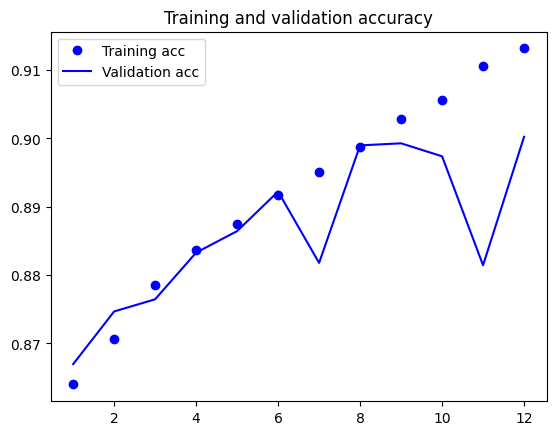

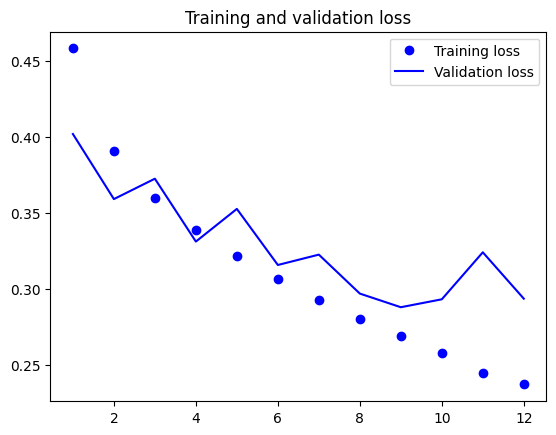

In [26]:
# Plot Validation and Training 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Test Model

In [27]:
# Modified From Image Classification Project
def whatamI(list):
  answers = ['negative', 'neutral', 'positive']
  # Default High Value as First Label
  high = list[0]
  hidex = 0
  for i in range(3):
    # Stores i and index of i if greater than high
    if high < list[i]:
      high = list[i]
      hidex = i
  return answers[hidex]

In [28]:
# All Predictions from Trained Model for Prepped Testing Set
amazook = model.predict(amMuTest500)
amazook

313/313 [==============================] - 1s 3ms/step


array([[3.1058507e-03, 2.1673756e-02, 9.7522038e-01],
       [1.8736288e-02, 6.6049471e-02, 9.1521418e-01],
       [1.5252223e-03, 9.7662741e-03, 9.8870850e-01],
       ...,
       [2.1770284e-02, 3.2470103e-02, 9.4575965e-01],
       [2.2394545e-02, 5.7232551e-02, 9.2037290e-01],
       [4.4028438e-04, 2.8364030e-03, 9.9672335e-01]], dtype=float32)

In [29]:
# A Negative Review
token.sequences_to_texts([amMuTest_sequences[9995]])

['i took it off my guitar i would rather look at a piece of paper in front of me than try and look at the guitar frets for chords it felt very awkward and was a lot of money for what you get save your money there are plenty of free guitar aids online if you look for chord training']

In [30]:
amazook[9995]

array([0.9097372 , 0.05859938, 0.0316634 ], dtype=float32)

In [31]:
whatamI(amazook[9995])

'negative'

In [32]:
# Outputs Percieved Labels, using function and predicted probabilities, into List for Transfer to Text File
reviewLabels = []
for i in amazook:
  reviewLabels.append(whatamI(i))

reviewLabels

['positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

### Output to File and Test

In [33]:
# Ouputs Array Contents into Text File
with open("amazonReviewsPredictions.txt", "w") as txt_file:
    for index, line in enumerate(reviewLabels):
      txt_file.write(line + "\n")

In [34]:
# Checks if Text File is correct by Prof's Standards
def test():
  i = 0
  answers = ['negative', 'neutral', 'positive']
  with open('amazonReviewsPredictions.txt', 'r') as outfile:
    lines = outfile.readlines()
    for line in lines:
        if line.strip() not in answers:
          return("invalid entry line %i" % (i))
        i += 1
    if i != 10000:
      return ("incorrect number of lines")
    else:
      return ("file looks ok")
test()

'file looks ok'

### Acknowledgements:

    -> Word Vector is from GloVe